In [7]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

## TESTING

### Create testing Voting and Issue Distributions

In [ ]:
# For simulation testing
issue_trials = [3,6,9]
voter_trials = [10]

### Function which attempts votes for all but last element in issue list.
Notes:
- The last element is determined in the next step, as due to random nature of selection the order of issues does not matter.
- For example, while a voter may want to use zero votes on something, as the number of issues increase we can assume the later issues can be intermediate issue on the list, such that the order does not matter.
- Also, while there is likely a certain probability distribution of hwo folks vote (the proportion of single issue voters may make using all 100 votes more likely), we are simplifying this with an unifrom distribution of probabilitties, alrhough the function can be modified with some work to redistribute probabilities based on the distribution size)

In [ ]:
def vote_attempt(votes_distro, credits_remaining):
    #print(credits)
    # Select a number from the distribution remaining
    if len(votes_distro) > 0:
        credits_attempt = np.random.choice(votes_distro)
    else: 
        return 0, []
    print('Credits attempt:',credits_attempt)
    # Determine if there are enough credits to support the vote
    if credits_attempt > credits_remaining:
        # If there aren't enough credits, remove those and all higher numbers from the distribution
        cut_index = votes_distro.index(credits_attempt)
        votes_distro = vote_credits_distro[1:cut_index + 1]
        print('fail', votes_distro)
        # Return this new distribution
        credits_left = vote_attempt(votes_distro, credits_remaining)
        return credits_left
    else:
        credits_left = (credits_remaining - credits_attempt)
        #print(credits_left)
        return credits_left, votes_distro

### Main Code for testing

In [ ]:
# Each trial consists of an issue set and different numbers of simulated voters
trial_counter = 1

# Total wasted votes in all trials
total_wasted_credits = 0

# Loop through each trial (issue set) simulating voting
for issues in issue_trials:
    # Wasted votes for this issue - useful to see how number of issues voting on effects vote waste
    issue_wasted_credits = 0
    
    print('Trial: ', trial_counter, '\n======\n')
    print('Issue Count: ', issues,'\n')
    
    for voters in voter_trials:
        
        for voter in range(voters):
            
            print('\nVoter: ', voter + 1)
   
            quad_votes_distro = [1,4,9,16,25,36,49,64,81,100]
            #tri_votes_distro = [1,3,6,10,15,21,28,36,45,55]

            credits = 100
            #tri_credits = 55

            for issue in range(issues)[:-1]:
                credits, quad_votes_distro = vote_attempt(quad_votes_distro, credits)
                print('Issue #',issue + 1,' Details: ',credits,quad_votes_distro)
                
            if credits == 0:
                print('Used all credits')
                
            if quad_votes_distro == []:
                print('Cleared out distro; credit check (should equal 0): ',credits)
                issue_wasted_credits += credits
                
            else:
                for element in quad_votes_distro[::-1]:
                    if credits >= element:
                        print('Final credits used: ',element)
                        credits -= element 
                        issue_wasted_credits += credits
                        print('voter wasted credits: ',credits)
                        break
    trial_counter += 1
    total_wasted_credits += issue_wasted_credits
    print(f'\nOut of {sum(voter_trials)*100} total credits available, there were {issue_wasted_credits} wasted credits - {issue_wasted_credits/(sum(voter_trials)*100)} were wasted.')
    print('\n')
    
print(f'Out of {sum(voter_trials)*100*(trial_counter-1)} total credits available, there were {total_wasted_credits} wasted credits - {total_wasted_credits/(sum(voter_trials)*100*trials)} were wasted.')

## EXECUTION

In [2]:
trials = 10

voter_trials = [int(x) for x in np.random.triangular(100,500,5000, size = trials)]
issue_trials = np.arange(2,16)

In [3]:
def vote_attempt(vote_credit_distribution, credits_remaining):
    # 1) Select a number from the distribution remaining:
    
    # First check to see if there is anything left in the vote distribution array
    if len(vote_credit_distribution) > 0:
        # If so randomly choose one of the votes - all squares of 1 to 10
        credits_attempt = np.random.choice(vote_credit_distribution)
    else: 
        # Otherwise return 0 credits left and an empty set (required for code to work)
        return 0, []
    

    # 2) Determine if there are enough credits to support the randomly chosen credit spend
    
    # If there aren't enough credits:
    if credits_attempt > credits_remaining:
        # Remove that and all higher numbers from the distribution
        cut_index = vote_credit_distribution.index(credits_attempt)
        vote_credit_distribution = vote_credit_distribution[1:cut_index + 1]
    
        # Then return this new distribution for the next attempt
        credits_left = vote_attempt(vote_credit_distribution, credits_remaining)
        return credits_left
    
    else:
        # If there are enough credits to satisfy the voting attempt, return the difference and the distro
        credits_left = (credits_remaining - credits_attempt)
        return credits_left, vote_credit_distribution

#### Quadratic, 2-10 issues:

In [4]:
quadratic = []

# Total wasted votes in all trials
total_wasted_credits = 0

# Loop through each trial (issue set) simulating voting
for issues in issue_trials:
    
    # Wasted votes for this issue - useful to see how number of issues voting on effects vote waste
    trial_wasted_credits = 0
    
    print('Issue Count: ', issues,'\n======\n')
    
    for voters in voter_trials:
        
        for voter in range(voters):
            
            # Select the distribution type below (quadratic vs triangular)
   
            quad_votes_distro = [1,4,9,16,25,36,49,64,81,100]
            #tri_votes_distro = [1,3,6,10,15,21,28,36,45,55]

            # Quadratic voting starting credits (supports max 10 votes on a single item)
            credits = 100
            
            # Triangular voting starting credits (supports max 10 votes on a single item)
            #credits = 55

            # For all issues up until the final, run the vote attempt function
            for issue in range(issues)[:-1]:
                credits, quad_votes_distro = vote_attempt(quad_votes_distro, credits)
            
            # This leaves the final issue, in order to better simulate reality, instead of selecting a random element
            # left from the distirbution list, we select the highest one:
            
            # If there are no elements left, skip to the next voter            
            if quad_votes_distro == []:
                continue
            
            # Otherwise, reverse the list so that it iterates max to min leftover, and select 
            # the largest number left in the distribution and regturn any leftover (wasted) credits
            else:
                for element in quad_votes_distro[::-1]:
                    if credits >= element:
                        credits -= element 
                        trial_wasted_credits += credits
                        break

    total_wasted_credits += trial_wasted_credits
    print(f'\nOut of {sum(voter_trials)*100} total credits available, there were {trial_wasted_credits} wasted credits - {round(trial_wasted_credits/(sum(voter_trials)*100),6)} were wasted.')
    print('\n')
    quadratic.append(round(trial_wasted_credits/(sum(voter_trials)*100),6))
    
print(f'Out of {sum(voter_trials)*100*len(issue_trials)} total credits available, there were {total_wasted_credits} wasted credits - {round(total_wasted_credits/(sum(voter_trials)*100*len(issue_trials)),6)} were wasted.')                                                                                                   
                                                                                                                                        

Issue Count:  2 


Out of 1659200 total credits available, there were 103162 wasted credits - 0.062176 were wasted.


Issue Count:  3 


Out of 1659200 total credits available, there were 86692 wasted credits - 0.052249 were wasted.


Issue Count:  4 


Out of 1659200 total credits available, there were 50350 wasted credits - 0.030346 were wasted.


Issue Count:  5 


Out of 1659200 total credits available, there were 28719 wasted credits - 0.017309 were wasted.


Issue Count:  6 


Out of 1659200 total credits available, there were 13308 wasted credits - 0.008021 were wasted.


Issue Count:  7 


Out of 1659200 total credits available, there were 6178 wasted credits - 0.003723 were wasted.


Issue Count:  8 


Out of 1659200 total credits available, there were 2004 wasted credits - 0.001208 were wasted.


Issue Count:  9 


Out of 1659200 total credits available, there were 830 wasted credits - 0.0005 were wasted.


Issue Count:  10 


Out of 1659200 total credits available, there wer

#### Triangular Voting, 2-10 issues

In [5]:
triangular = []

# Total wasted votes in all trials
total_wasted_credits = 0

# Loop through each trial (issue set) simulating voting
for issues in issue_trials:
    
    # Wasted votes for this issue - useful to see how number of issues voting on effects vote waste
    trial_wasted_credits = 0
    
    print('Issue Count: ', issues,'\n======\n')
    
    for voters in voter_trials:
        
        for voter in range(voters):
            
            # Select the distribution type below (quadratic vs triangular)
   
            #quad_votes_distro = [1,4,9,16,25,36,49,64,81,100]
            tri_votes_distro = [1,3,6,10,15,21,28,36,45,55]

            # Quadratic voting starting credits (supports max 10 votes on a single item)
            #credits = 100
            
            # Triangular voting starting credits (supports max 10 votes on a single item)
            credits = 55

            # For all issues up until the final, run the vote attempt function
            for issue in range(issues)[:-1]:
                credits, tri_votes_distro = vote_attempt(tri_votes_distro, credits)
            
            # This leaves the final issue, in order to better simulate reality, instead of selecting a random element
            # left from the distirbution list, we select the highest one:
            
            # If there are no elements left, skip to the next voter            
            if tri_votes_distro == []:
                continue
            
            # Otherwise, reverse the list so that it iterates max to min leftover, and select 
            # the largest number left in the distribution and regturn any leftover (wasted) credits
            else:
                for element in tri_votes_distro[::-1]:
                    if credits >= element:
                        credits -= element 
                        trial_wasted_credits += credits
                        break

    total_wasted_credits += trial_wasted_credits
    print(f'\nOut of {sum(voter_trials)*100} total credits available, there were {trial_wasted_credits} wasted credits - {round(trial_wasted_credits/(sum(voter_trials)*100),6)} were wasted.')
    print('\n')
    triangular.append(round(trial_wasted_credits/(sum(voter_trials)*100),6))
    
print(f'Out of {sum(voter_trials)*100*len(issue_trials)} total credits available, there were {total_wasted_credits} wasted credits - {round(total_wasted_credits/(sum(voter_trials)*100*len(issue_trials)),6)} were wasted.')

Issue Count:  2 


Out of 1659200 total credits available, there were 66369 wasted credits - 0.040001 were wasted.


Issue Count:  3 


Out of 1659200 total credits available, there were 39745 wasted credits - 0.023954 were wasted.


Issue Count:  4 


Out of 1659200 total credits available, there were 19659 wasted credits - 0.011848 were wasted.


Issue Count:  5 


Out of 1659200 total credits available, there were 10575 wasted credits - 0.006374 were wasted.


Issue Count:  6 


Out of 1659200 total credits available, there were 4845 wasted credits - 0.00292 were wasted.


Issue Count:  7 


Out of 1659200 total credits available, there were 1779 wasted credits - 0.001072 were wasted.


Issue Count:  8 


Out of 1659200 total credits available, there were 493 wasted credits - 0.000297 were wasted.


Issue Count:  9 


Out of 1659200 total credits available, there were 205 wasted credits - 0.000124 were wasted.


Issue Count:  10 


Out of 1659200 total credits available, there were 

In [10]:
vote_compare = pd.DataFrame(zip(triangular,quadratic), index = issue_trials, columns = ['Triangular','Quadratic'])
vote_compare = vote_compare * 100

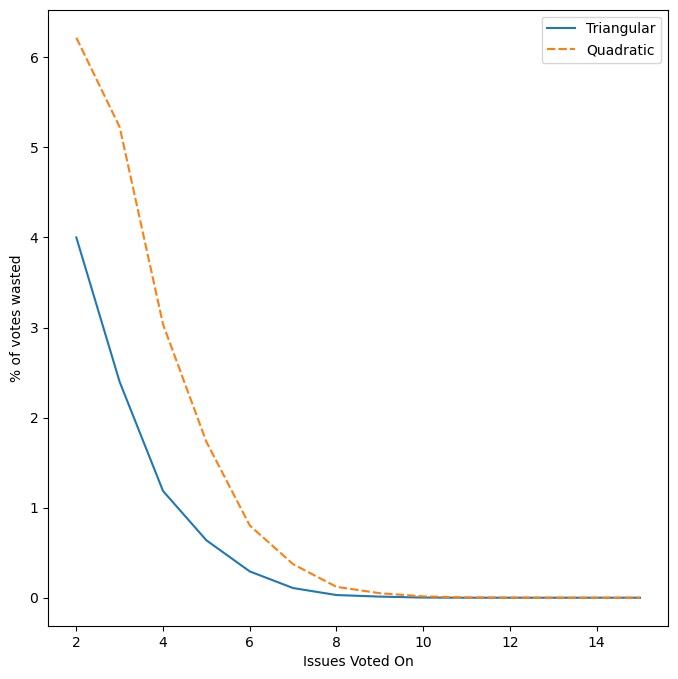

In [15]:
plt.figure(figsize = (8,8))
plt.xlabel('Issues Voted On')
plt.ylabel('% of votes wasted')
sns.lineplot(data = vote_compare)
plt.show()
